In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sheet_to_df_map = pd.read_excel("transformed_by_factors_v2.xlsx",index_col=0, sheet_name=None)
sheet_to_df_map.keys()
selected_factors = ['1M FWD', '2Y Swap Rate', 'cbpol', 'Citi Early Warning Signal', 'Citi Econs Surprise', 'Citi Inflation Surprise', 'Citi Terms of Trade','Equities', 'FX Reserves', 'Implied FX Vol', 'm_gdp.R_FW_IX', 'Money Supply LCY',  'REER', 'x_gdp.R_FW_IX']
# 0 -> larger the better ; 1 -> smaller the better
ranking_order = [0,0,0,1,0,1,0,0,0,1,1,1,0,0]
unwanted = set(sheet_to_df_map.keys()) - set(selected_factors)
for unwanted_key in unwanted: del sheet_to_df_map[unwanted_key]

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
time_index = sheet_to_df_map['REER'].index
ccy_list = sheet_to_df_map['REER'].columns[1:] # exclude USD

In [3]:
ranking_df_by_factor = {}
j = 0
for i in sheet_to_df_map.keys():
    df_factor = sheet_to_df_map[i].loc[:, sheet_to_df_map[i].columns != 'USD'] # exclude USD
    df_factor = df_factor.rank(axis=1, ascending=ranking_order[j])
    ranking_df_by_factor[i] = df_factor
    j+=1

In [4]:
## all columns name need to be CCY name, instead of country name/label
ranking_df_by_ccy = {}
for i in ccy_list:
    df_ccy = pd.DataFrame(index = time_index)
    for j in sheet_to_df_map.keys():
        if i not in  ranking_df_by_factor[j].columns:
            continue
        df_ccy[j] = ranking_df_by_factor[j][i]
    ranking_df_by_ccy[i] = df_ccy

In [5]:
daily_ave_ranking_df = pd.DataFrame(index = time_index)
for i in ccy_list:
    daily_ave_ranking_df[i] = ranking_df_by_ccy[i].mean(axis = 1)
daily_ave_ranking_df

,EUR,JPY,GBP,CHF,CAD,AUD,NZD,NOK,SEK,BRL,...,SGD,THB,TWD,CZK,PLN,RUB,ZAR,COP,PHP,DKK
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-31,13.583333,16.076923,14.961538,15.384615,11.846154,12.769231,14.615385,12.576923,13.538462,9.142857,...,15.153846,15.230769,15.1,14.500000,11.571429,8.545455,11.642857,8.076923,12.428571,14.666667
2004-02-29,13.750000,15.461538,14.615385,16.615385,14.115385,13.000000,14.923077,14.269231,13.192308,15.071429,...,15.230769,13.846154,12.1,11.884615,12.785714,11.916667,10.500000,11.423077,11.857143,12.666667
2004-03-31,19.000000,15.153846,14.038462,16.769231,12.230769,13.076923,15.923077,12.423077,17.461538,12.071429,...,15.076923,15.384615,11.0,14.153846,11.500000,9.166667,8.214286,8.038462,14.392857,16.833333
2004-04-30,16.333333,16.615385,15.615385,14.307692,13.538462,13.500000,14.000000,9.038462,14.538462,11.857143,...,14.769231,14.384615,9.0,16.000000,13.750000,9.083333,9.857143,9.115385,11.607143,15.916667
2004-05-31,15.166667,19.461538,14.538462,13.461538,11.846154,12.423077,15.230769,10.884615,14.000000,15.142857,...,11.230769,17.307692,13.5,14.153846,10.535714,9.083333,12.142857,11.961538,14.535714,10.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,15.333333,17.000000,14.769231,15.692308,15.307692,10.538462,17.461538,9.230769,19.000000,12.214286,...,10.000000,12.357143,13.7,12.821429,14.928571,11.500000,10.285714,10.928571,13.535714,15.583333
2022-03-31,15.916667,18.769231,15.038462,15.692308,9.346154,8.153846,12.153846,11.653846,17.615385,11.714286,...,15.461538,15.464286,17.1,16.035714,14.678571,12.285714,9.928571,8.750000,14.392857,13.666667
2022-04-30,13.750000,17.384615,15.653846,14.461538,12.000000,13.692308,15.884615,13.423077,12.384615,12.571429,...,15.000000,14.285714,16.0,11.714286,11.357143,9.857143,11.928571,14.821429,12.392857,12.750000


In [6]:
DM_List = ['EUR', 'JPY', 'GBP', 'CHF', 'CAD', 'AUD', 'NZD', 'NOK', 'SEK','DKK']
EM_List = [x for x in daily_ave_ranking_df.columns if x not in DM_List]
ccy_pairs = 3
import Ranking_tool_position_builder
# fifth parameter as 0 -> all ccys to be considered in ranking, 1 -> only DM, 2 -> only EM
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List)

In [7]:
positions # 2004-1-31 indicator showing long short in Feb, back test with Jan-Feb Spot Move and Fwd Cost

,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,...,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30
EUR,0,0,-1,-1,0,0,0,0,0,0,...,0,-1,0,-1,0,0,0,0,0,0
JPY,-1,-1,0,-1,-1,0,-1,-1,-1,-1,...,0,-1,-1,-1,-1,-1,-1,-1,0,0
GBP,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,-1
CHF,0,-1,0,0,0,0,-1,-1,0,-1,...,-1,0,0,1,-1,0,0,0,-1,-1
CAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AUD,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,1,0,0,0
NZD,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-1,0,-1,0,0
NOK,0,0,0,1,0,0,0,0,-1,0,...,0,1,-1,0,1,1,0,0,0,0
SEK,0,0,-1,0,0,0,0,0,0,0,...,-1,0,0,0,0,-1,-1,0,0,0
BRL,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Back Test

In [8]:
#ccy_not_in_data = ['SGD','TWD']
#new_positions = positions.loc[~positions.index.isin(ccy_not_in_data)]

new_positions = positions.copy()
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

In [9]:
df = pd.read_excel('Monthly Data.xlsx', sheet_name=0, index_col = 0).iloc[2:,:]
df_1mpoints = pd.read_excel('Monthly Data.xlsx', sheet_name=1, index_col = 0).iloc[2:,:]
df = df.astype(float)
df_1mpoints = df_1mpoints.astype(float)
log_r_df = np.log(df/df.shift(-1)).dropna()

In [10]:
# Constrct 1m points
fwd_points = pd.DataFrame()
for i in range(len(df_1mpoints)):
    zz  = df.iloc[i:i+1,:].T.reset_index().iloc[:,1:] / df_1mpoints.iloc[i:i+1,:].T.reset_index().iloc[:,1:] - 1
    fwd_points = fwd_points.append(zz.T)
fwd_points.columns = df.columns

In [11]:
import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
x_date = '2018-09-30'
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date, 1, 0)

Accum_monthly_return.sum()

2004-03-31   -0.017812
2004-04-30    0.004929
2004-05-31    0.046424
2004-06-30    0.033881
2004-08-31   -0.001792
                ...   
2022-01-31    0.626783
2022-02-28    0.694376
2022-03-31    0.685155
2022-05-31    1.002290
2022-06-30    0.825473
Length: 159, dtype: float64

## Plots for DM + EM

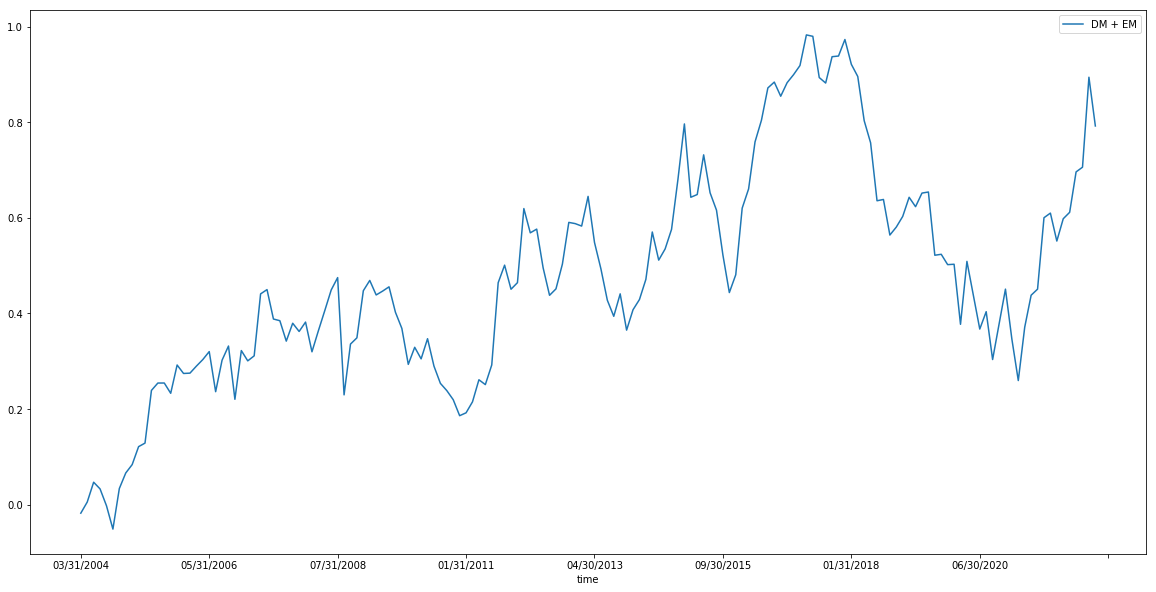

In [12]:
# Long short CCYs
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List)
new_positions = positions.copy()
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
Mothly_return, Accum_monthly_return,cy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM + EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [13]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
ccy,
USDRUB Curncy,0.633048
USDCOP Curncy,0.259598
USDJPY Curncy,0.216148
USDMXN Curncy,0.199212
USDBRL Curncy,0.190664
USDKRW Curncy,0.184478
USDCHF Curncy,0.118528
USDTWD Curncy,0.102069
USDEUR Curncy,0.073732


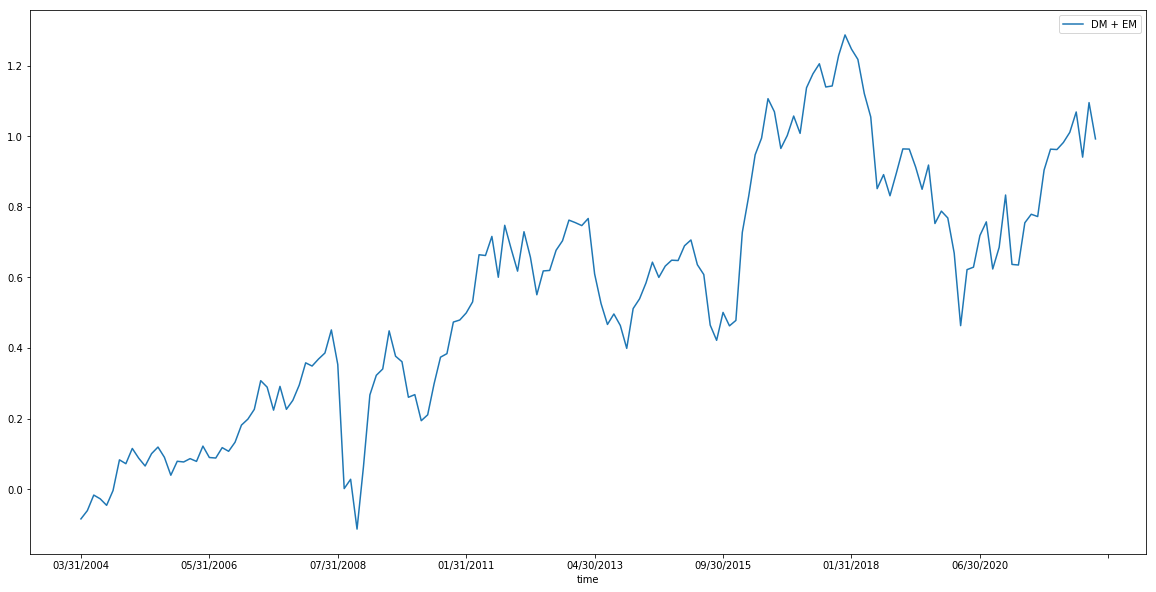

In [14]:
# Long only CCYs
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List)
new_positions = positions.copy()
new_positions.replace(-1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date, 0, 1)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM + EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [15]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
ccy,
USDRUB Curncy,0.577963
USDCOP Curncy,0.232240
USDBRL Curncy,0.219939
USDMXN Curncy,0.197060
USDPHP Curncy,0.125309
USDNOK Curncy,0.066598
USDIDR Curncy,0.040974
USDPLN Curncy,0.038368
USDTWD Curncy,0.036331


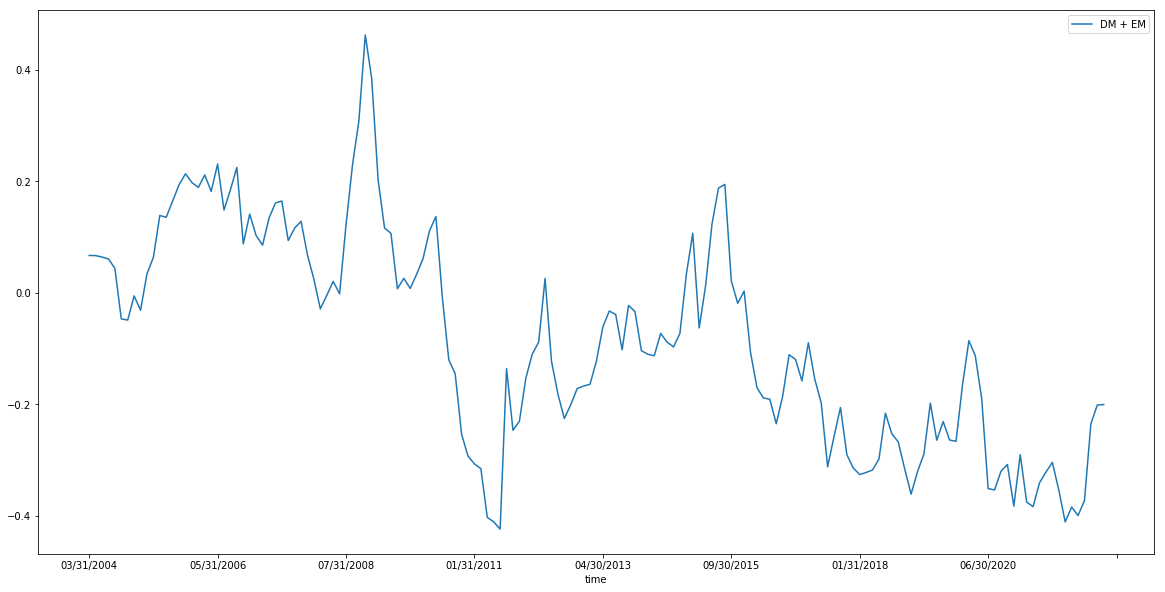

In [16]:
# Short only CCYs
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List)
new_positions = positions.copy()
new_positions.replace(1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 2 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date, 0, 2)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM + EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [17]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
ccy,
USDJPY Curncy,0.216148
USDKRW Curncy,0.149581
USDCHF Curncy,0.134865
USDCZK Curncy,0.089553
USDTWD Curncy,0.065737
USDCLP Curncy,0.065321
USDEUR Curncy,0.061607
USDMYR Curncy,0.058953
USDRUB Curncy,0.055084


## Plots for DM only

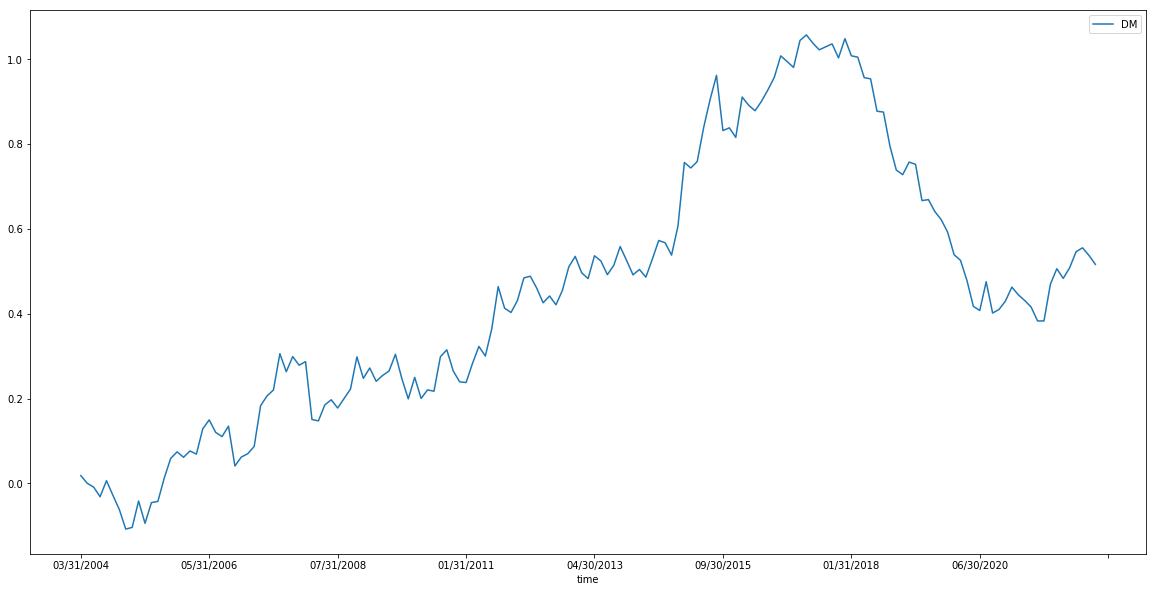

In [18]:
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,1)
new_positions = positions.copy()
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
Mothly_return, Accum_monthly_return, ccy_pairs_table,Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [19]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDJPY Curncy,0.451988
USDEUR Curncy,0.445264
USDAUD Curncy,0.348278
USDNZD Curncy,0.146231
USDSEK Curncy,0.010024
USDCAD Curncy,0.009572
USDCHF Curncy,-0.089128
USDGBP Curncy,-0.128799
USDDKK Curncy,-0.214719
USDNOK Curncy,-0.462554


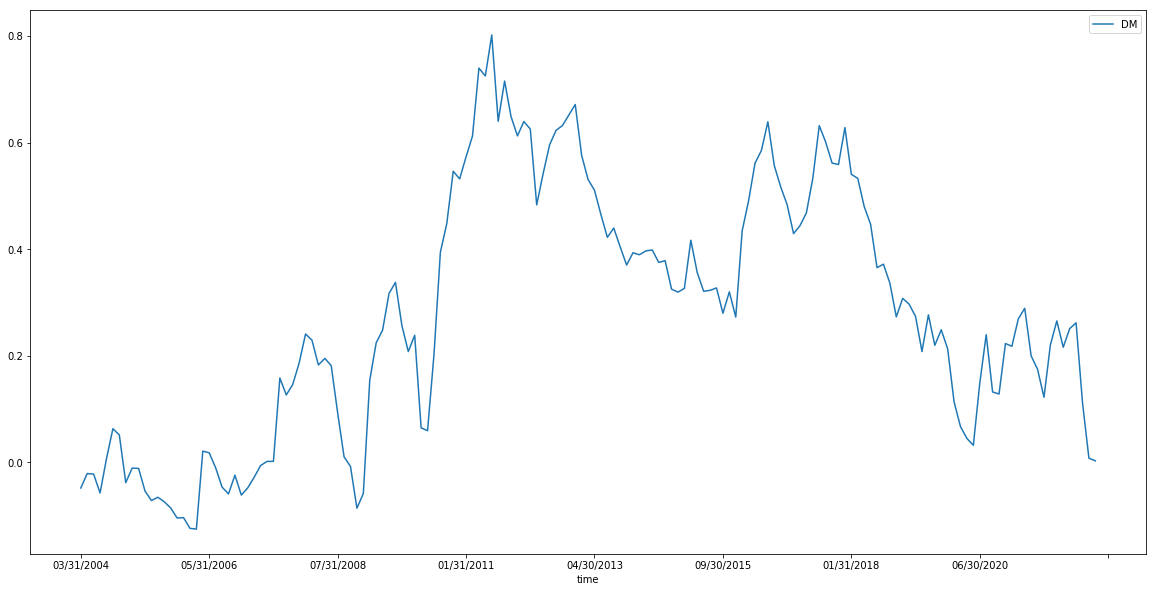

In [20]:
# Long only CCYs
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,1)
new_positions = positions.copy()
new_positions.replace(-1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table,Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs,x_date, 0, 1)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [21]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDAUD Curncy,0.336732
USDEUR Curncy,0.184272
USDJPY Curncy,0.158652
USDNZD Curncy,0.155811
USDCAD Curncy,0.045445
USDCHF Curncy,-0.104315
USDDKK Curncy,-0.117721
USDGBP Curncy,-0.125022
USDSEK Curncy,-0.250193
USDNOK Curncy,-0.281070


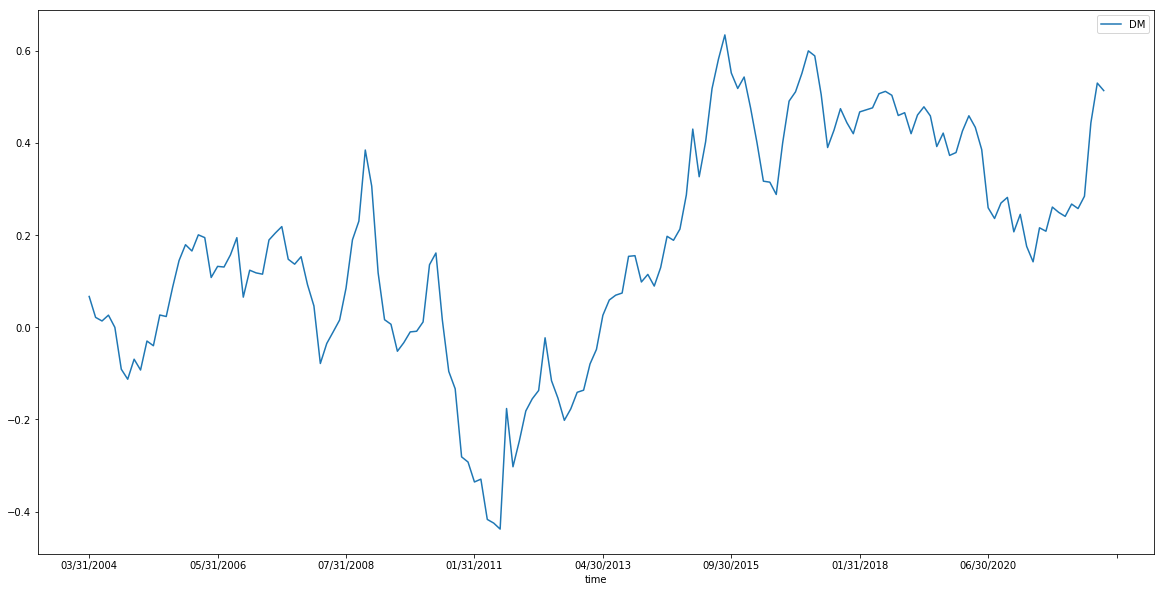

In [22]:
# Short only CCYs
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,1)
new_positions = positions.copy()
new_positions.replace(1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return,  ccy_pairs_table,Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date,0, 2)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [23]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDJPY Curncy,0.293335
USDEUR Curncy,0.260992
USDSEK Curncy,0.260218
USDCHF Curncy,0.015187
USDAUD Curncy,0.011546
USDGBP Curncy,-0.003778
USDNZD Curncy,-0.009580
USDCAD Curncy,-0.035873
USDDKK Curncy,-0.096998
USDNOK Curncy,-0.181485


## Plots for EM only

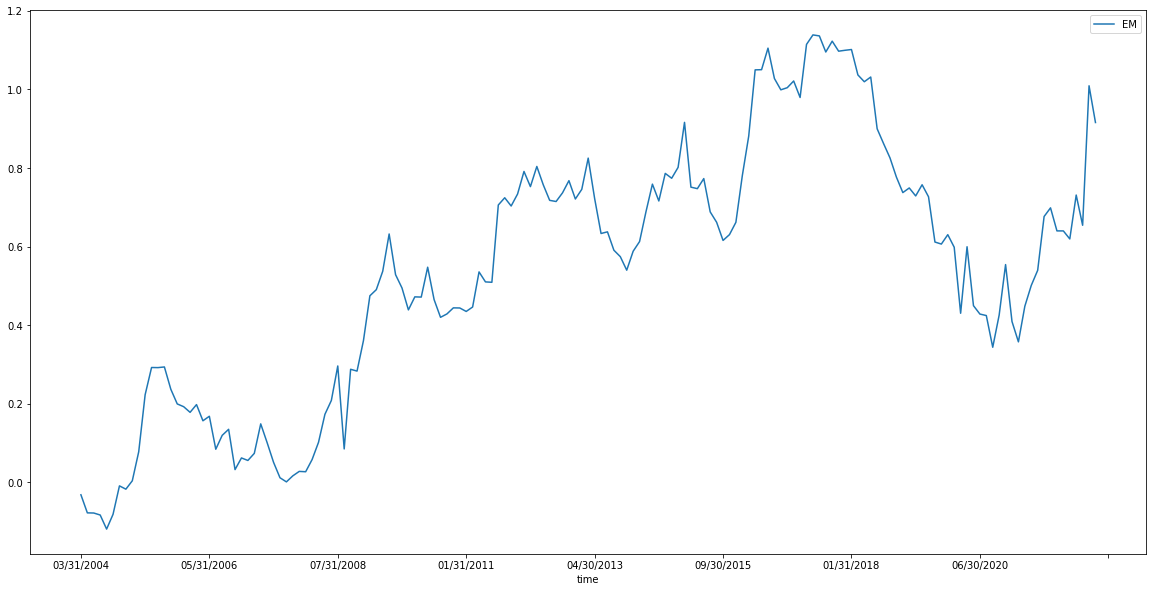

In [24]:
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,2)
new_positions = positions.copy()
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs,x_date)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [25]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDRUB Curncy,0.717670
USDKRW Curncy,0.348915
USDBRL Curncy,0.340360
USDCLP Curncy,0.298790
USDCOP Curncy,0.254858
USDTWD Curncy,0.098326
USDMXN Curncy,0.046294
USDPHP Curncy,0.039751
USDCZK Curncy,0.036672
USDSGD Curncy,0.028678


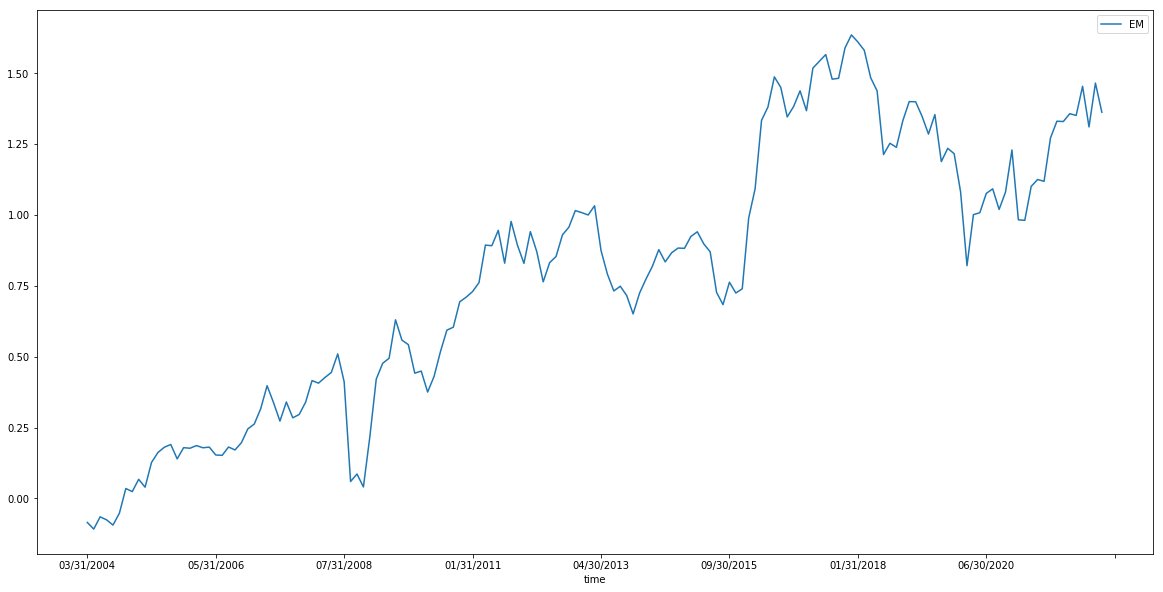

In [26]:
# Long only ccys
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,2)
new_positions = positions.copy()
new_positions.replace(-1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs, x_date, 0, 1)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [27]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDRUB Curncy,0.582620
USDCOP Curncy,0.445138
USDBRL Curncy,0.417766
USDMXN Curncy,0.198204
USDPHP Curncy,0.146264
USDKRW Curncy,0.053810
USDIDR Curncy,0.042778
USDCLP Curncy,0.042248
USDTHB Curncy,0.036800
USDTWD Curncy,0.036331


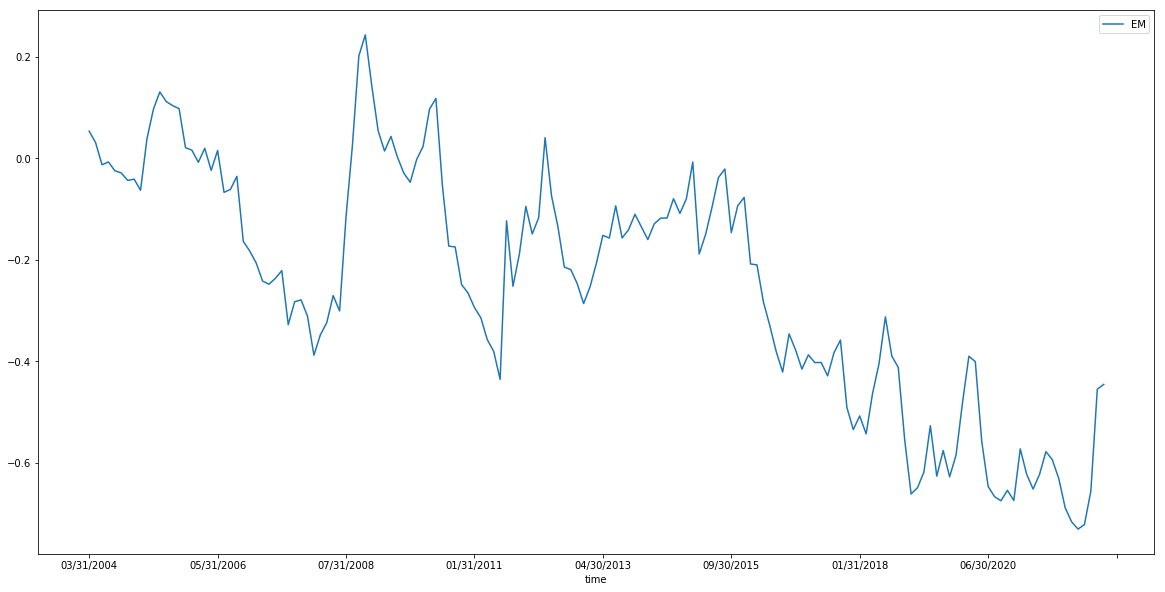

In [28]:
# Short only ccys
positions = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,2)
new_positions = positions.copy()
new_positions.replace(1,0, inplace=True)
new_positions['ccy'] = 'USD' + new_positions.index + ' Curncy'
new_positions.set_index('ccy', inplace=True)
new_positions.columns = pd.to_datetime(new_positions.columns)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table,  Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs,x_date, 0, 2)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['EM'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [29]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDKRW Curncy,0.295105
USDCLP Curncy,0.256541
USDRUB Curncy,0.135050
USDCZK Curncy,0.079000
USDMYR Curncy,0.067021
USDTWD Curncy,0.061994
USDSGD Curncy,0.008898
USDBRL Curncy,-0.077406
USDCNY Curncy,-0.095415
USDTHB Curncy,-0.106427


## Plots for Long EM only and Short DM only

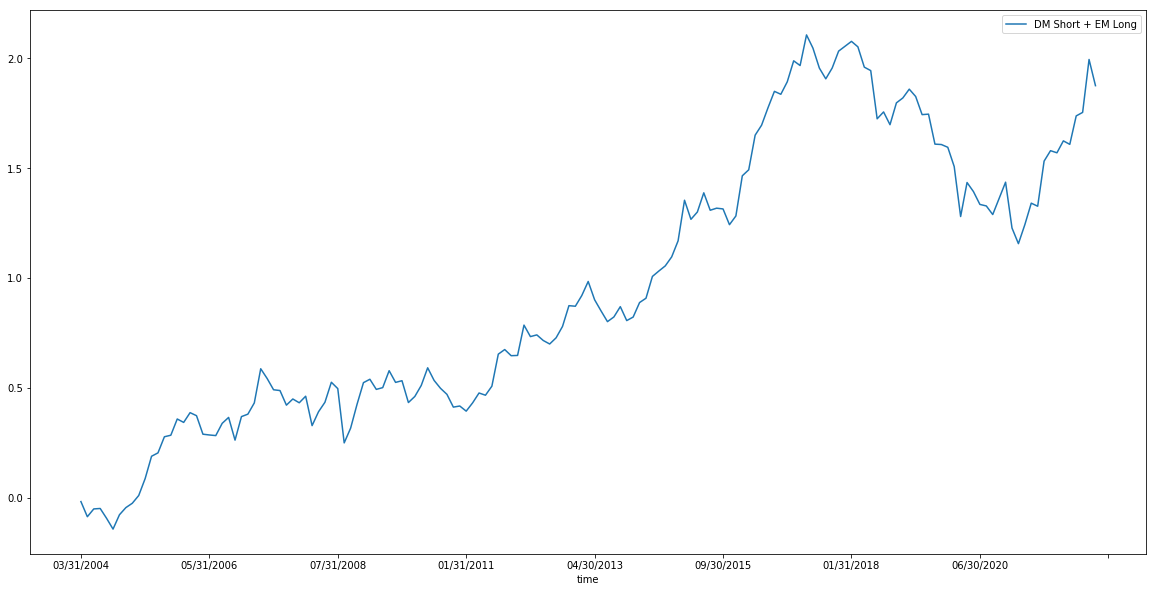

In [30]:
# Short only DM CCYs
positions_DM = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,1)
new_positions_DM = positions_DM.copy()
new_positions_DM.replace(1,0, inplace=True)
new_positions_DM['ccy'] = 'USD' + new_positions_DM.index + ' Curncy'
new_positions_DM.set_index('ccy', inplace=True)
new_positions_DM.columns = pd.to_datetime(new_positions_DM.columns)

# Long only EM ccys
positions_EM = Ranking_tool_position_builder.Ranking_Signal(daily_ave_ranking_df, ccy_pairs,DM_List,EM_List,2)
new_positions_EM = positions_EM.copy()
new_positions_EM.replace(-1,0, inplace=True)
new_positions_EM['ccy'] = 'USD' + new_positions_EM.index + ' Curncy'
new_positions_EM.set_index('ccy', inplace=True)
new_positions_EM.columns = pd.to_datetime(new_positions_EM.columns)

new_positions = new_positions_DM.append(new_positions_EM)

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 0 (short ccy only)
Mothly_return, Accum_monthly_return,  ccy_pairs_table, Summary_Table = PnL_Calc.PnL(new_positions, log_r_df, fwd_points, ccy_pairs,x_date, 0, 0)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['DM Short + EM Long'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [31]:
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
USDRUB Curncy,0.582620
USDCOP Curncy,0.445138
USDBRL Curncy,0.417766
USDJPY Curncy,0.293335
USDEUR Curncy,0.260992
USDSEK Curncy,0.260218
USDMXN Curncy,0.198204
USDPHP Curncy,0.146264
USDKRW Curncy,0.053810
USDIDR Curncy,0.042778
